In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [6]:
with tf.Session() as sess:
    bs = 50
    lr = 0.075
    it = 200
    
    x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    
    A = tf.Variable(tf.random_normal(shape=[1, 1]))
    b = tf.Variable(tf.random_normal(shape=[1, 1]))
    
    model_output = tf.add(tf.matmul(x_data, A), b)
    
    epsilon = tf.constant([0.5])
    
    loss = tf.reduce_mean(tf.maximum(0., tf.subtract(tf.abs(
        tf.subtract(model_output, y_target)), epsilon)))
    
    my_opt = tf.train.GradientDescentOptimizer(lr)
    train_step = my_opt.minimize(loss)
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    train_loss = []
    test_loss = []
    for i in range(it):
        rand_index = np.random.choice(len(x_vals_train), size=bs)
        rand_x = np.transpose([x_vals_train[rand_index]])
        rand_y = np.transpose([y_vals_train[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        
        temp_train_loss = sess.run(loss, feed_dict={
            x_data: np.transpose([x_vals_train]),
            y_target: np.transpose([y_vals_train]),
        })
        train_loss.append(temp_train_loss)
        
        temp_test_loss = sess.run(loss, feed_dict={
            x_data: np.transpose([x_vals_test]),
            y_target: np.transpose([y_vals_test]),
        })
        test_loss.append(temp_test_loss)
                
        if (i + 1) % 50 == 0:
            print('-------------')
            print('Generation: ' + str(i + 1))
            print('A = {}, b = {}'.format(
                str(sess.run(A)),
                str(sess.run(b)),
            ))
            print('Train Loss = ' + str(temp_train_loss))
            print('Test Loss = ' + str(temp_test_loss))
    
    [[slope]] = sess.run(A)
    [[y_intercept]] = sess.run(b)
    [width] = sess.run(epsilon)

-------------
Generation: 50
A = [[2.371174]], b = [[2.3812265]]
Train Loss = 0.6849837
Test Loss = 0.73777145
-------------
Generation: 100
A = [[1.8346237]], b = [[3.4237273]]
Train Loss = 0.32653537
Test Loss = 0.38721806
-------------
Generation: 150
A = [[1.3174238]], b = [[4.121227]]
Train Loss = 0.12273919
Test Loss = 0.18095826
-------------
Generation: 200
A = [[1.1297737]], b = [[4.4332256]]
Train Loss = 0.08074085
Test Loss = 0.13962597


In [7]:
best_fit = []
best_fit_upper = []
best_fit_lower = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)
    best_fit_upper.append(slope * i + y_intercept + width)
    best_fit_lower.append(slope * i + y_intercept - width)

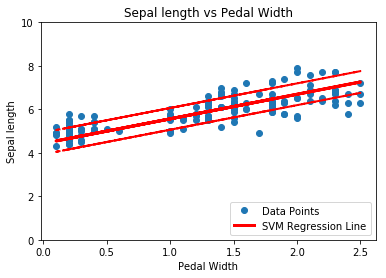

In [8]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='SVM Regression Line', linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=2)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=2)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal length')
plt. show()

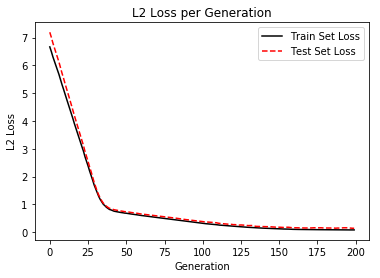

In [9]:
plt.plot(train_loss, 'k-', label='Train Set Loss')
plt.plot(test_loss, 'r--', label='Test Set Loss')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.legend(loc='upper right')
plt.show()